In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(16,9)})
sns.set_context('talk')
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 2000)

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Collection

In [2]:
df = pd.read_csv('out/collection_270122.csv')
df.id.count()

302

### Pricing overview - the most valuable records

In [3]:
df_plot = df.sort_values(by=['med'], ascending=False).head(100)

In [4]:
df.dtypes

id                int64
title            object
start           float64
avg_rating       object
rating_count      int64
low             float64
med             float64
high            float64
want              int64
have              int64
last_sold        object
for_sale          int64
url              object
dtype: object

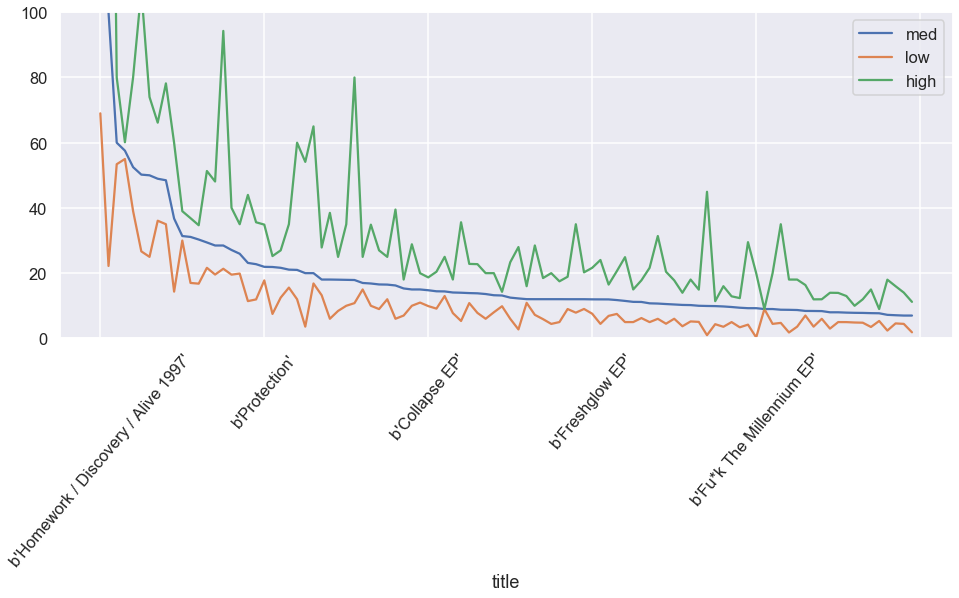

In [5]:
x = df_plot[['title', 'med', 'low', 'high']].plot(kind='line', x='title', figsize=[16,6], ylim=(0,100))
plt.xticks(rotation=50)
plt.show()

In [6]:
df_plot.head(10)

,id,title,start,avg_rating,rating_count,low,med,high,want,have,last_sold,for_sale,url
266,135671,b'Homework / Discovery / Alive 1997',400.30,,116,69.00,283.50,902.02,512,581,"Nov 26, 2021",11,https://www.discogs.com/release/135671
10,6424917,b'Alive 2007',100.00,,739,22.21,100.00,300.00,3128,6992,"Jan 25, 2022",17,https://www.discogs.com/release/6424917
277,9056717,b'Outer Edges',51.72,,64,53.40,60.00,80.00,323,311,"Jan 5, 2022",4,https://www.discogs.com/release/9056717
198,15047338,b'W 63 Minuty Dooko\xc5\x82a \xc5\x9awiata',64.00,,5,55.00,57.56,60.14,20,64,"Apr 9, 2021",5,https://www.discogs.com/release/15047338
236,6826317,b'The Day Is My Enemy',40.00,,204,39.00,52.50,80.09,583,1378,"Dec 10, 2021",43,https://www.discogs.com/release/6826317
57,1058605,b'All Eyez On Me',62.30,,1076,26.68,50.21,106.79,3331,11722,"Jan 26, 2022",22,https://www.discogs.com/release/1058605
153,8465720,b'Play',49.18,,771,25.00,50.00,74.00,2641,7083,"Jan 26, 2022",14,https://www.discogs.com/release/8465720
111,18024649,b'H25pital',37.27,,36,36.08,48.95,66.14,71,257,"Jan 18, 2022",16,https://www.discogs.com/release/18024649
257,2367912,b'She Knows You',80.00,,15,35.00,48.48,78.18,215,49,"Jul 25, 2021",2,https://www.discogs.com/release/2367912
235,12747317,b'No Tourists',38.00,,86,14.34,36.74,59.95,245,617,"Nov 24, 2021",19,https://www.discogs.com/release/12747317


In [7]:
df_plot.head(10)['med'].sum(), df_plot.head(10)['start'].sum()

(787.94, 922.77)

In [8]:
df[['med', 'low', 'high', 'start']].sum()

med      2679.66
low      1403.64
high     5558.17
start    2421.68
dtype: float64

### Low supply, high demand

In [9]:
low_supply = df[(df['for_sale'] < 6) & (df['want'].astype(int) > 100)]

In [10]:
low_supply.id.count()

18

In [11]:
low_supply['start'].sum()

403.37

In [12]:
low_supply['med'].sum().round(2)

325.32

In [13]:
low_supply.sort_values(by='start', ascending=False)

,id,title,start,avg_rating,rating_count,low,med,high,want,have,last_sold,for_sale,url
257,2367912,b'She Knows You',80.00,,15,35.00,48.48,78.18,215,49,"Jul 25, 2021",2,https://www.discogs.com/release/2367912
269,13861184,b'RTRN II JUNGLE',55.00,,72,21.64,29.41,51.32,364,776,"Jan 19, 2022",2,https://www.discogs.com/release/13861184
277,9056717,b'Outer Edges',51.72,,64,53.40,60.00,80.00,323,311,"Jan 5, 2022",4,https://www.discogs.com/release/9056717
121,9433709,b'Voodoo People',45.00,,3,8.42,18.00,24.99,168,26,"Aug 17, 2021",2,https://www.discogs.com/release/9433709
24,7724343,b'Jungle Revolution In Dub',29.55,,39,15.57,21.08,35.00,307,565,"Jan 25, 2022",2,https://www.discogs.com/release/7724343
165,445341,b'Adventures In Success',17.80,,21,5.06,10.00,14.95,317,175,"Aug 11, 2021",4,https://www.discogs.com/release/445341
179,16227441,b'Magic Plush',16.99,,42,15.00,16.99,24.99,248,271,"Jan 24, 2022",4,https://www.discogs.com/release/16227441
183,12066554,b'Heat',16.95,,41,7.76,14.07,18.04,275,247,"Apr 12, 2021",1,https://www.discogs.com/release/12066554
278,112902,b'Darkdancer',16.91,,39,10.00,17.95,35.00,199,289,"Jan 14, 2022",5,https://www.discogs.com/release/112902
291,1074649,b'One Love',12.02,,36,7.00,15.31,18.04,211,249,"Nov 23, 2021",5,https://www.discogs.com/release/1074649


### Rare records with high demand - prices higher than highest sale in history

In [14]:
df[(df['start'] > df['high']) & (df['want'].astype(int) > 100)]

,id,title,start,avg_rating,rating_count,low,med,high,want,have,last_sold,for_sale,url
121,9433709,b'Voodoo People',45.0,,3,8.42,18.00,24.99,168,26,"Aug 17, 2021",2,https://www.discogs.com/release/9433709
165,445341,b'Adventures In Success',17.8,,21,5.06,10.00,14.95,317,175,"Aug 11, 2021",4,https://www.discogs.com/release/445341
257,2367912,b'She Knows You',80.0,,15,35.00,48.48,78.18,215,49,"Jul 25, 2021",2,https://www.discogs.com/release/2367912
269,13861184,b'RTRN II JUNGLE',55.0,,72,21.64,29.41,51.32,364,776,"Jan 19, 2022",2,https://www.discogs.com/release/13861184


### Valuable records - history prices valued more than 3 times current median

In [15]:
df[(3*df['med'] < df['high']) & (df['want'].astype(int) > 100)]

,id,title,start,avg_rating,rating_count,low,med,high,want,have,last_sold,for_sale,url
15,217280,b'Cocomotion',2.67,,52,0.54,4.00,14.00,299,350,"Jan 2, 2022",19,https://www.discogs.com/release/217280
82,3880279,b'Bad 25',14.99,,145,16.84,20.00,65.00,497,1402,"Jan 15, 2022",22,https://www.discogs.com/release/3880279
94,9134,b'Life Is Sweet',3.55,,218,4.75,8.79,35.00,558,1834,"Jan 6, 2022",43,https://www.discogs.com/release/9134
102,74529,b'Dub Be Good To Me (Remixes)',1.99,,42,2.39,3.12,12.01,169,347,"Nov 23, 2021",38,https://www.discogs.com/release/74529
160,1508621,b'Tical 2000 Instrumental LP',9.00,,11,0.99,9.94,44.95,117,86,"Jun 15, 2021",7,https://www.discogs.com/release/1508621
167,7184,b'Musical Ethics EP',0.44,,41,0.99,1.74,5.99,125,344,"Dec 8, 2021",57,https://www.discogs.com/release/7184
169,12814480,"b""It's Album Time""",21.64,,55,21.35,28.48,94.27,535,710,"Jan 17, 2022",21,https://www.discogs.com/release/12814480
190,189138,b'Watch Out Now',2.22,,225,1.78,3.64,15.59,349,2367,"Jan 26, 2022",74,https://www.discogs.com/release/189138
206,21637,b'Everybody Needs A 303',1.00,,103,1.49,4.00,14.42,196,1123,"Jan 19, 2022",57,https://www.discogs.com/release/21637
227,24190,b'Bad Enough',1.19,,122,2.40,4.49,17.80,227,992,"Jan 19, 2022",67,https://www.discogs.com/release/24190


### High demand records - more people want than actually have these records

In [16]:
df.query('want>have').sort_values(by='want', ascending=False)

,id,title,start,avg_rating,rating_count,low,med,high,want,have,last_sold,for_sale,url
202,1676821,b'Atmosphere E.P. Vol. 1',5.81,,91,4.35,9.90,11.41,740,507,"Oct 29, 2021",7,https://www.discogs.com/release/1676821
53,135212,b'Time To Shuff EP',16.00,,72,8.00,13.23,20.00,581,294,"Jan 13, 2022",10,https://www.discogs.com/release/135212
292,1629903,b'No Good (Start The Dance)',8.97,,38,6.00,12.50,23.35,373,281,"Jan 19, 2022",14,https://www.discogs.com/release/1629903
147,10292,b'Freshglow EP',7.00,,46,7.56,11.97,21.64,364,141,"Nov 13, 2020",9,https://www.discogs.com/release/10292
2,8723030,b'Hi Fi Ep ',4.90,,53,2.99,6.00,14.24,340,329,"Nov 14, 2021",24,https://www.discogs.com/release/8723030
277,9056717,b'Outer Edges',51.72,,64,53.40,60.00,80.00,323,311,"Jan 5, 2022",4,https://www.discogs.com/release/9056717
165,445341,b'Adventures In Success',17.80,,21,5.06,10.00,14.95,317,175,"Aug 11, 2021",4,https://www.discogs.com/release/445341
183,12066554,b'Heat',16.95,,41,7.76,14.07,18.04,275,247,"Apr 12, 2021",1,https://www.discogs.com/release/12066554
262,1550206,b'Jazz Note 1 / Burning',9.90,,31,5.00,9.62,12.90,254,213,"Jan 17, 2022",3,https://www.discogs.com/release/1550206
56,153742,b'Tales From A Danceographic Ocean',7.99,,38,6.90,11.95,16.50,253,174,"Oct 11, 2021",8,https://www.discogs.com/release/153742
